In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras, os
from keras.layers import Conv2D, MaxPool2D,Dropout,Flatten,Dense
from keras.preprocessing import image 
from keras.models import Sequential
import numpy as np
import tensorflow as tf
from tensorflow import keras


2022-11-30 11:05:29.971251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 11:05:30.202006: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-30 11:05:30.202022: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-30 11:05:30.235688: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-30 11:05:30.910830: W tensorflow/stream_executor/platform/de

In [3]:
layer1 = keras.layers.Dense(3, activation="relu")
layer2 = keras.layers.Dense(3, activation="sigmoid")
model = keras.Sequential([keras.Input(shape=(3,)), layer1, layer2])
# Freeze the first layer
layer1.trainable = False
layer2.trainable = False
model.pop()
#remove the layer
print(len(model.layers))

1


2022-11-30 11:05:32.153899: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-11-30 11:05:32.154008: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: jacques-ubuntu
2022-11-30 11:05:32.154038: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: jacques-ubuntu
2022-11-30 11:05:32.154273: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 520.56.6
2022-11-30 11:05:32.154364: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 520.56.6
2022-11-30 11:05:32.154390: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 520.56.6
2022-11-30 11:05:32.155572: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance

In [4]:
train_data_gen = image.ImageDataGenerator(rescale= 1./255, validation_split=0.2,  rotation_range=90 ,fill_mode='nearest',cval=0.0, horizontal_flip=True, vertical_flip=True)
train = train_data_gen.flow_from_directory(directory="casting_512x512/",target_size=(256,256) , batch_size=32, class_mode = 'binary', subset='training')
test = train_data_gen.flow_from_directory(directory="casting_512x512/",target_size=(256,256) , batch_size=32, class_mode = 'binary', subset='validation')


Found 1041 images belonging to 2 classes.
Found 259 images belonging to 2 classes.


In [5]:
from tensorflow.keras.applications import Xception
xcept = Xception(input_shape = (256, 256, 3), include_top = False, weights = 'imagenet')

In [6]:
inputs = keras.Input(shape=(256, 256, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. 
x = xcept(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [7]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 20,863,529
Trainable params: 20,809,001
Non-trainable params: 54,528
_________________________________________________________________
None


In [8]:
model.fit(train,epochs=10,steps_per_epoch=7,validation_data=test,validation_steps=len(test))

Epoch 1/10
7/7 [==============================] - 46s 6s/step - loss: 0.7605 - accuracy: 0.5694 - val_loss: 0.6930 - val_accuracy: 0.6023
Epoch 2/10
7/7 [==============================] - 43s 6s/step - loss: 0.7779 - accuracy: 0.5938 - val_loss: 0.6926 - val_accuracy: 0.6023
Epoch 3/10
7/7 [==============================] - 43s 6s/step - loss: 0.6925 - accuracy: 0.5982 - val_loss: 0.6921 - val_accuracy: 0.6023
Epoch 4/10
7/7 [==============================] - 42s 6s/step - loss: 0.6915 - accuracy: 0.6429 - val_loss: 0.6917 - val_accuracy: 0.6023
Epoch 5/10
7/7 [==============================] - 40s 6s/step - loss: 0.6920 - accuracy: 0.5742 - val_loss: 0.6912 - val_accuracy: 0.6023
Epoch 6/10
7/7 [==============================] - 40s 6s/step - loss: 0.6908 - accuracy: 0.6172 - val_loss: 0.6908 - val_accuracy: 0.6023
Epoch 7/10
7/7 [==============================] - 44s 6s/step - loss: 0.6907 - accuracy: 0.5982 - val_loss: 0.6904 - val_accuracy: 0.6023
Epoch 8/10
7/7 [==================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


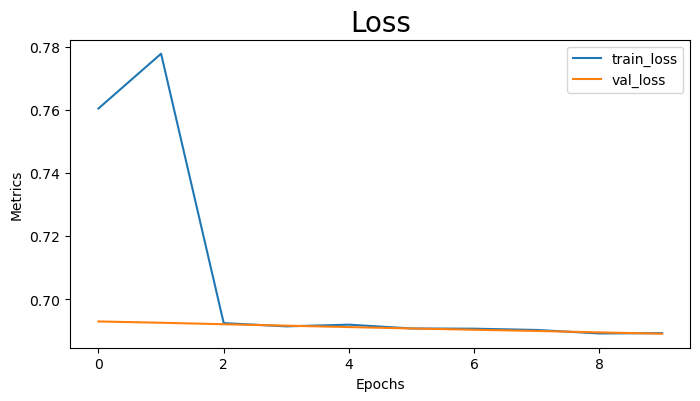

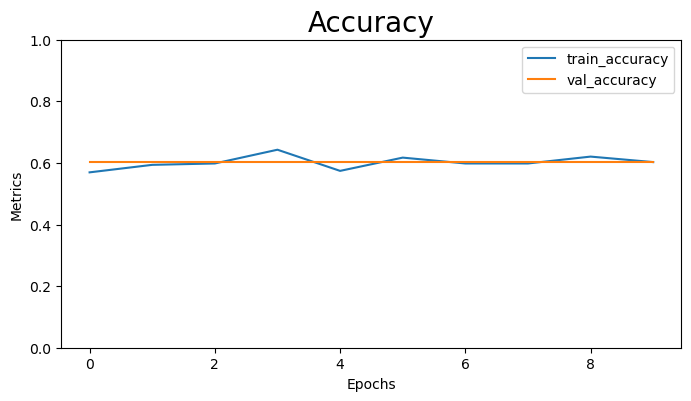

In [9]:
print(model.history.history.keys())
plt.subplots(figsize = (8, 4))
X = range(1, 1+len(model.history.epoch))
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Loss", fontsize = 20)
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.legend(labels = ['train_loss', 'val_loss'])
plt.show()

# plot accuracy
plt.subplots(figsize = (8, 4))
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Accuracy", fontsize = 20)
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.ylim(0,1)
plt.legend(labels = ['train_accuracy', 'val_accuracy'])
plt.show()


In [5]:
from tensorflow.keras.applications import Xception,ResNet50
resNet50 = ResNet50( include_top=False,weights="imagenet",classifier_activation="softmax",)

In [6]:
inputs = keras.Input(shape=(256, 256, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. 
x = resNet50(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [7]:
print(model.summary())
#model.fit(train,epochs=2,steps_per_epoch=7,validation_data=test,validation_steps=len(test))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_4 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________
None


In [10]:
type_model = []
from tensorflow.keras.applications import Xception,MobileNet,ResNet50
data_augmentation= ['yes', 'no'],
xcept = Xception(input_shape =(256, 256, 3), include_top = False, weights = 'imagenet')
mobilenet =MobileNet(input_shape =(256, 256, 3),include_top=False,weights="imagenet")
resNet50 = ResNet50( include_top=False,weights="imagenet",classifier_activation="softmax")
type_model.append(xcept)
type_model.append(mobilenet)
type_model.append(resNet50)


In [11]:
data = {'type de model':[], 'split data':[],'Number of training images': [],'Number of test images':[],
        'Testing accuracy' :[]}
                      

In [12]:
type_model = []
models = []
Number_training_images = []
Number_test_images = []
split_list = []
Testing_accuracy = []
data_augmentation1 = []
from tensorflow.keras.applications import Xception,MobileNet,ResNet50
data_augmentation = np.array(['yes', 'no'])
type_model = np.array([ Xception(input_shape =(256, 256, 3), include_top = False, weights = 'imagenet')
, MobileNet(input_shape =(256, 256, 3),include_top=False,weights="imagenet")
, ResNet50( include_top=False,weights="imagenet",classifier_activation="softmax")])

# type_model.append(xcept)
# type_model.append(mobilenet)
# type_model.append(resNet50)


list_split = [0.05,0.1,0.5,0.8]
count = 0
for i in list_split:
    for data in range(len(data_augmentation)):
        if data_augmentation[data] == "yes":
            train_data_gen = image.ImageDataGenerator(rescale= 1./255, validation_split=i,  rotation_range=90,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)
            train = train_data_gen.flow_from_directory(directory="casting_512x512/" , target_size=(256,256) , batch_size=32, class_mode = 'binary', subset='training')
            test = train_data_gen.flow_from_directory(directory="casting_512x512/" , target_size=(256,256) , batch_size=32, class_mode = 'binary', subset='validation')
            print("yes")
            for el in type_model:
                el.trainable = False
                inputs = keras.Input(shape=(256, 256, 3))
                x = el(inputs, training=False)
                x = keras.layers.GlobalAveragePooling2D()(x)
                outputs = keras.layers.Dense(1)(x)
                model = keras.Model(inputs, outputs)
                model.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
                model.fit(train,epochs=10,steps_per_epoch=7,validation_data=test,validation_steps=len(test))
                
                if el == type_model[0]:
                    models.append('Xception')
                if el == type_model[1]:
                    models.append('MobileNet')
                if el == type_model[0]:
                    models.append('ResNet50')
                data_augmentation1.append("yes")
                split_list.append(i)
                Number_training_images.append((1-i)*100)
                Number_test_images.append(i*100)
                Testing_accuracy.append(model.history.history['accuracy'][-1])
        else:   
            print("no")
            train_data_gen = image.ImageDataGenerator(rescale= 1./255, validation_split=i)
            train = train_data_gen.flow_from_directory(directory="casting_512x512/" , target_size=(256,256) , batch_size=32, class_mode = 'binary', subset='training')
            test = train_data_gen.flow_from_directory(directory="casting_512x512/" , target_size=(256,256) , batch_size=32, class_mode = 'binary', subset='validation')
            for el in type_model:
                el.trainable = False
                inputs = keras.Input(shape=(256, 256, 3))
                x = el(inputs, training=False)
                x = keras.layers.GlobalAveragePooling2D()(x)
                outputs = keras.layers.Dense(1)(x)
                model = keras.Model(inputs, outputs)
                model.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
                model.fit(train,epochs=10,steps_per_epoch=7,validation_data=test,validation_steps=len(test))
                
                data_augmentation1.append("no")
                if el == type_model[0]:
                    models.append('Xception')
                if el == type_model[1]:
                    models.append('MobileNet')
                if el == type_model[0]:
                    models.append('ResNet50')
                split_list.append(i)
                Number_training_images.append((1-i)*100)
                Number_test_images.append(i*100)
                Testing_accuracy.append(model.history.history['accuracy'][-1])

data = dict({"type de model": models,"data_augmentation": data_augmentation1,"split_data":split_list,
             "Number_training_images":Number_training_images, "Number of test images":Number_test_images,"Testing accuracy":Testing_accuracy})

Found 1236 images belonging to 2 classes.
Found 64 images belonging to 2 classes.
yes
Epoch 1/10
7/7 [==============================] - 12s 1s/step - loss: 0.6387 - accuracy: 0.6205 - val_loss: 0.6331 - val_accuracy: 0.6094
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.5619 - accuracy: 0.6384 - val_loss: 0.5737 - val_accuracy: 0.6094
Epoch 3/10
7/7 [==============================] - 10s 1s/step - loss: 0.5437 - accuracy: 0.6741 - val_loss: 0.5382 - val_accuracy: 0.7344
Epoch 4/10
7/7 [==============================] - 10s 1s/step - loss: 0.5203 - accuracy: 0.7217 - val_loss: 0.5273 - val_accuracy: 0.7188
Epoch 5/10
7/7 [==============================] - 10s 1s/step - loss: 0.5568 - accuracy: 0.6518 - val_loss: 0.5313 - val_accuracy: 0.7656
Epoch 6/10
7/7 [==============================] - 10s 1s/step - loss: 0.5152 - accuracy: 0.7188 - val_loss: 0.4943 - val_accuracy: 0.7344
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.4717 - accuracy:

Epoch 8/10
7/7 [==============================] - 11s 2s/step - loss: 0.6658 - accuracy: 0.5848 - val_loss: 0.6561 - val_accuracy: 0.6094
Epoch 9/10
7/7 [==============================] - 10s 2s/step - loss: 0.6623 - accuracy: 0.5893 - val_loss: 0.6578 - val_accuracy: 0.6094
Epoch 10/10
7/7 [==============================] - 10s 1s/step - loss: 0.6652 - accuracy: 0.5402 - val_loss: 0.6489 - val_accuracy: 0.6094
Found 1171 images belonging to 2 classes.
Found 129 images belonging to 2 classes.
yes
Epoch 1/10
7/7 [==============================] - 13s 2s/step - loss: 0.7444 - accuracy: 0.5804 - val_loss: 0.6655 - val_accuracy: 0.6047
Epoch 2/10
7/7 [==============================] - 11s 2s/step - loss: 0.6346 - accuracy: 0.6256 - val_loss: 0.5887 - val_accuracy: 0.6047
Epoch 3/10
7/7 [==============================] - 12s 2s/step - loss: 0.5889 - accuracy: 0.6250 - val_loss: 0.5725 - val_accuracy: 0.6279
Epoch 4/10
7/7 [==============================] - 11s 2s/step - loss: 0.5922 - accur

Epoch 6/10
7/7 [==============================] - 13s 2s/step - loss: 0.6517 - accuracy: 0.5982 - val_loss: 0.6513 - val_accuracy: 0.6047
Epoch 7/10
7/7 [==============================] - 13s 2s/step - loss: 0.6496 - accuracy: 0.6071 - val_loss: 0.6515 - val_accuracy: 0.6047
Epoch 8/10
7/7 [==============================] - 16s 2s/step - loss: 0.6540 - accuracy: 0.5848 - val_loss: 0.6510 - val_accuracy: 0.6047
Epoch 9/10
7/7 [==============================] - 13s 2s/step - loss: 0.6383 - accuracy: 0.6071 - val_loss: 0.6442 - val_accuracy: 0.6047
Epoch 10/10
7/7 [==============================] - 13s 2s/step - loss: 0.6306 - accuracy: 0.6161 - val_loss: 0.6419 - val_accuracy: 0.6047
Found 651 images belonging to 2 classes.
Found 649 images belonging to 2 classes.
yes
Epoch 1/10
7/7 [==============================] - 30s 5s/step - loss: 0.6827 - accuracy: 0.6250 - val_loss: 0.6560 - val_accuracy: 0.6009
Epoch 2/10
7/7 [==============================] - 26s 4s/step - loss: 0.6341 - accura

7/7 [==============================] - 33s 5s/step - loss: 0.6545 - accuracy: 0.6205 - val_loss: 0.6549 - val_accuracy: 0.6009
Epoch 5/10
7/7 [==============================] - 33s 5s/step - loss: 0.6531 - accuracy: 0.6429 - val_loss: 0.6558 - val_accuracy: 0.6009
Epoch 6/10
7/7 [==============================] - 33s 5s/step - loss: 0.6557 - accuracy: 0.6161 - val_loss: 0.6491 - val_accuracy: 0.6009
Epoch 7/10
7/7 [==============================] - 32s 5s/step - loss: 0.6428 - accuracy: 0.6059 - val_loss: 0.6483 - val_accuracy: 0.6009
Epoch 8/10
7/7 [==============================] - 33s 5s/step - loss: 0.6538 - accuracy: 0.6161 - val_loss: 0.6460 - val_accuracy: 0.6009
Epoch 9/10
7/7 [==============================] - 32s 5s/step - loss: 0.6362 - accuracy: 0.5961 - val_loss: 0.6428 - val_accuracy: 0.6009
Epoch 10/10
7/7 [==============================] - 30s 5s/step - loss: 0.6262 - accuracy: 0.6205 - val_loss: 0.6427 - val_accuracy: 0.6009
Found 261 images belonging to 2 classes.
Fou

7/7 [==============================] - 43s 7s/step - loss: 0.6911 - accuracy: 0.6071 - val_loss: 0.7376 - val_accuracy: 0.6006
Epoch 3/10
7/7 [==============================] - 42s 7s/step - loss: 0.7378 - accuracy: 0.5685 - val_loss: 0.6680 - val_accuracy: 0.6006
Epoch 4/10
7/7 [==============================] - 43s 7s/step - loss: 0.6785 - accuracy: 0.5939 - val_loss: 0.6805 - val_accuracy: 0.6006
Epoch 5/10
7/7 [==============================] - 42s 7s/step - loss: 0.6820 - accuracy: 0.5635 - val_loss: 0.6696 - val_accuracy: 0.6006
Epoch 6/10
7/7 [==============================] - 44s 7s/step - loss: 0.6643 - accuracy: 0.5893 - val_loss: 0.6589 - val_accuracy: 0.6006
Epoch 7/10
7/7 [==============================] - 42s 7s/step - loss: 0.6660 - accuracy: 0.5939 - val_loss: 0.6584 - val_accuracy: 0.6006
Epoch 8/10
7/7 [==============================] - 43s 7s/step - loss: 0.6509 - accuracy: 0.6116 - val_loss: 0.6535 - val_accuracy: 0.6006
Epoch 9/10
7/7 [=============================

In [13]:
import pandas as pd
pd.DataFrame.from_dict(data)

,type de model,data_augmentation,split_data,Number_training_images,Number of test images,Testing accuracy
0,Xception,yes,0.05,95.0,5.0,0.803571
1,ResNet50,yes,0.05,95.0,5.0,0.709821
2,MobileNet,yes,0.05,95.0,5.0,0.580357
3,Xception,no,0.05,95.0,5.0,0.776786
4,ResNet50,no,0.05,95.0,5.0,0.776786
5,MobileNet,no,0.05,95.0,5.0,0.540179
6,Xception,yes,0.10,90.0,10.0,0.763393
7,ResNet50,yes,0.10,90.0,10.0,0.727679
8,MobileNet,yes,0.10,90.0,10.0,0.607143
9,Xception,no,0.10,90.0,10.0,0.754464


In [28]:
type_model = np.array([xcept,mobilenet,resNet50])
# for i ,val in enumerate(type_model):
#     print(type_model[i])